In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Downloading and reading Dataset
df=pd.read_csv('modified_bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## EDA Analysis

In [ ]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


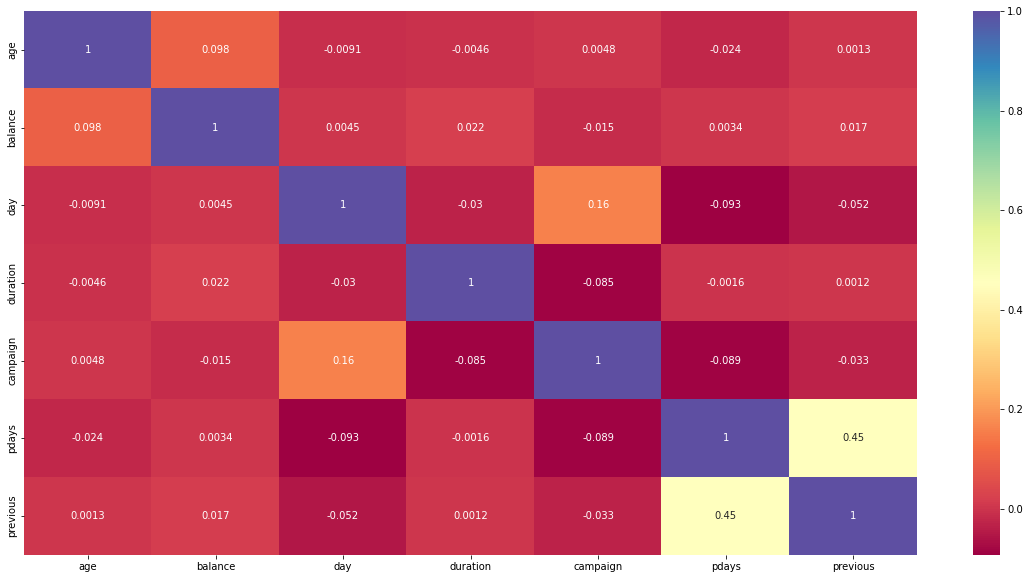

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True,cmap='Spectral')



In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
pd.DataFrame(df['y'].value_counts()).head()

,y
no,39922
yes,5289


In [ ]:
print("There are ",df[df['y']=='yes'].shape[0],'product subscribed')
print("There are ",df[df['y']=='no'].shape[0],'Not product subscribed')

There are  5289 product subscribed
There are  39922 Not product subscribed


In [ ]:
df.groupby(["y"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


## Checking for the Outliers Using Boxplots

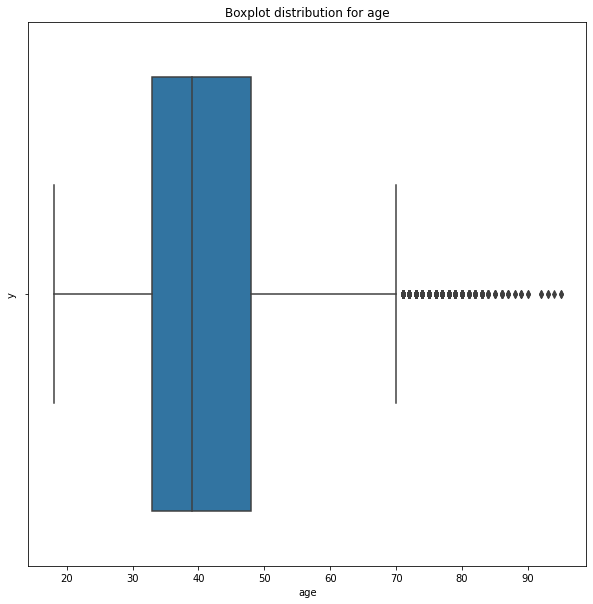

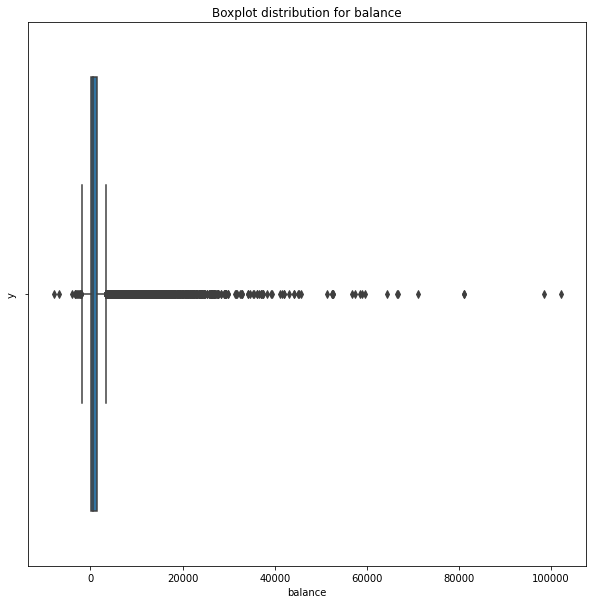

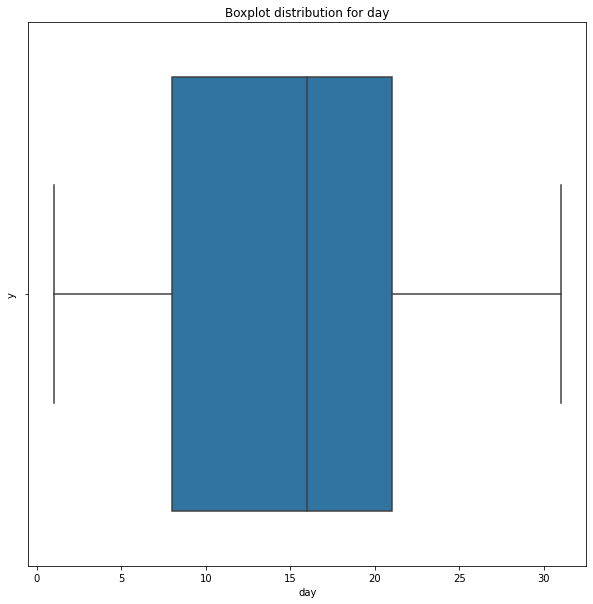

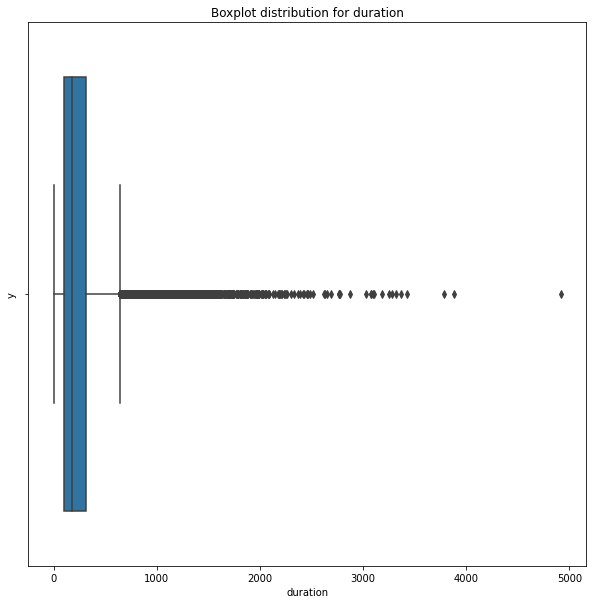

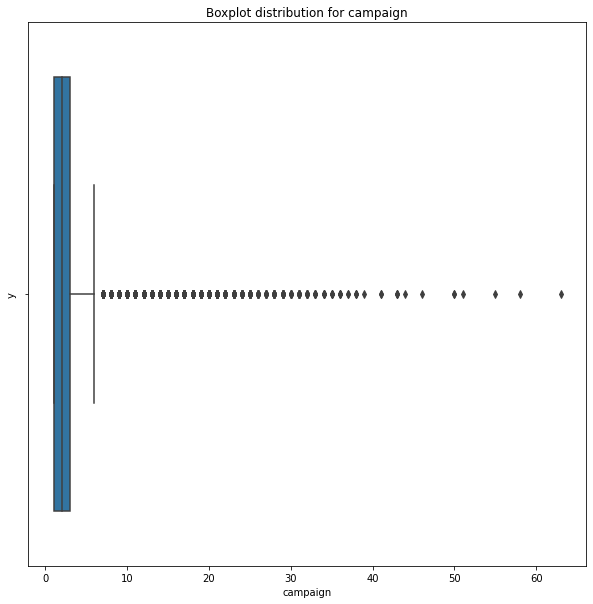

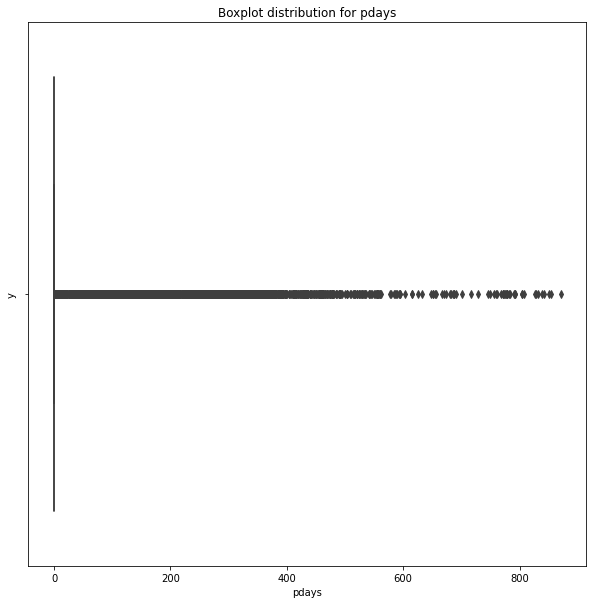

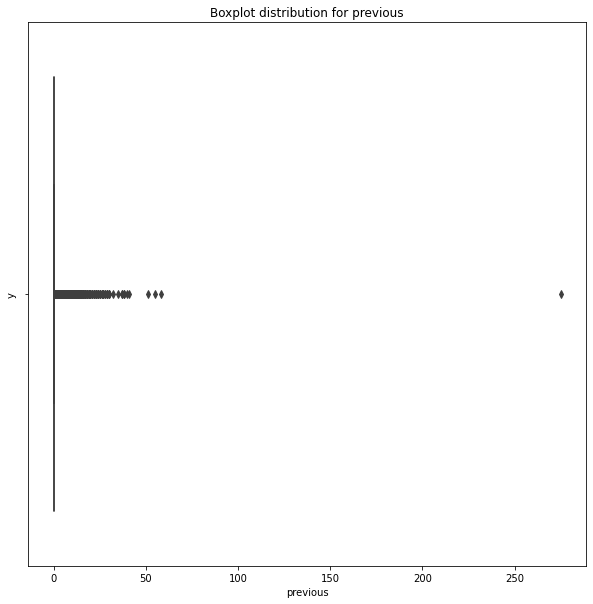

In [ ]:
def My_Boxplot(cols):
  for i in cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(x=i,data=df)
    plt.xlabel(i)
    plt.ylabel('y')
    plt.title('Boxplot distribution for '+i) 
    plt.show()
My_Boxplot(df.select_dtypes(exclude='O').columns)
#here we can see different outliers ranges for all the numerical data points

In [ ]:
df.select_dtypes(exclude='O').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

## Checking the Outliers for Numerical data using IQR formula

In [ ]:
def My_Outlier(cols):
  # Quartiles
  l1=[]
  l2=[]
  for i in cols:
    Q1 = df[i].quantile(q = 0.25)
    Q2 = df[i].quantile(q = 0.50)
    Q3 = df[i].quantile(q = 0.75)
    Q4 = df[i].quantile(q = 1.00)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    l1.append(lower)
    l2.append(upper)
  #print('lower range of outliers of',cols,'are\n',l1)
  #print('upper range of outliers of',cols,'are\n',l2)

  d=dict()
  for i in range(len(cols)):
    col=cols[i]
    d[col]=l2[i]
  #print(d)
  DF=pd.DataFrame(d,index=[0])

  return DF
My_Outlier(df.select_dtypes(exclude='O').columns)

    

,age,balance,day,duration,campaign,pdays,previous
0,70.5,3462.0,40.5,643.0,6.0,-1.0,0.0


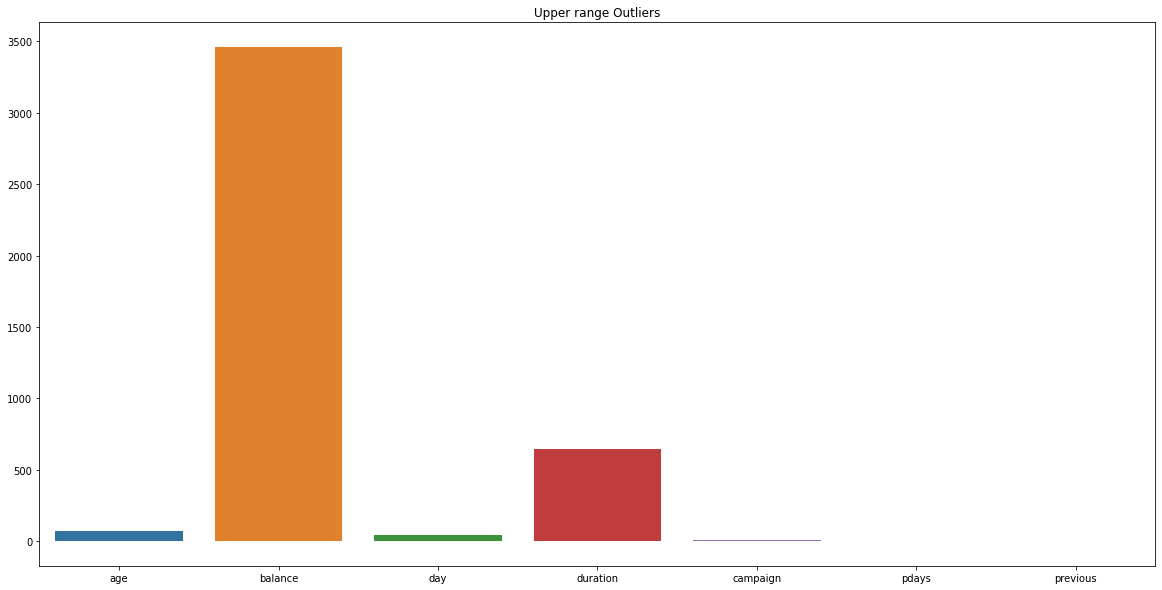

In [ ]:
# According to our Boxplots lets see some insights on upper outliers range
plt.figure(figsize=(20,10))
sns.barplot(data=My_Outlier(df.select_dtypes(exclude='O').columns))
plt.title("Upper range Outliers")
plt.show()


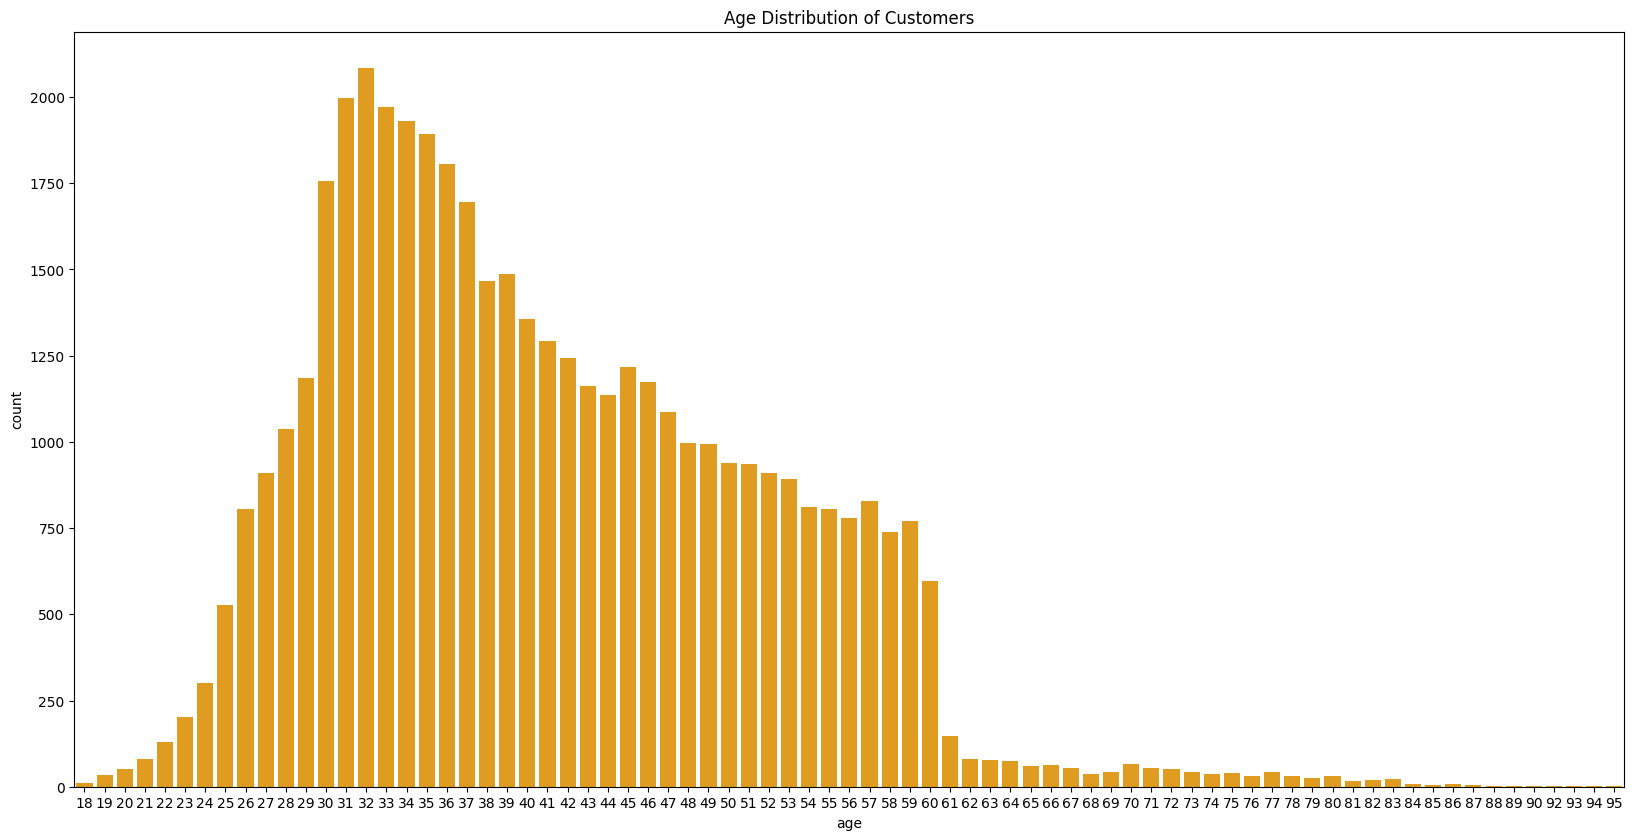

In [ ]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(data=df,x='age',color='orange') 
plt.title("Age Distribution of Customers")
plt.show()


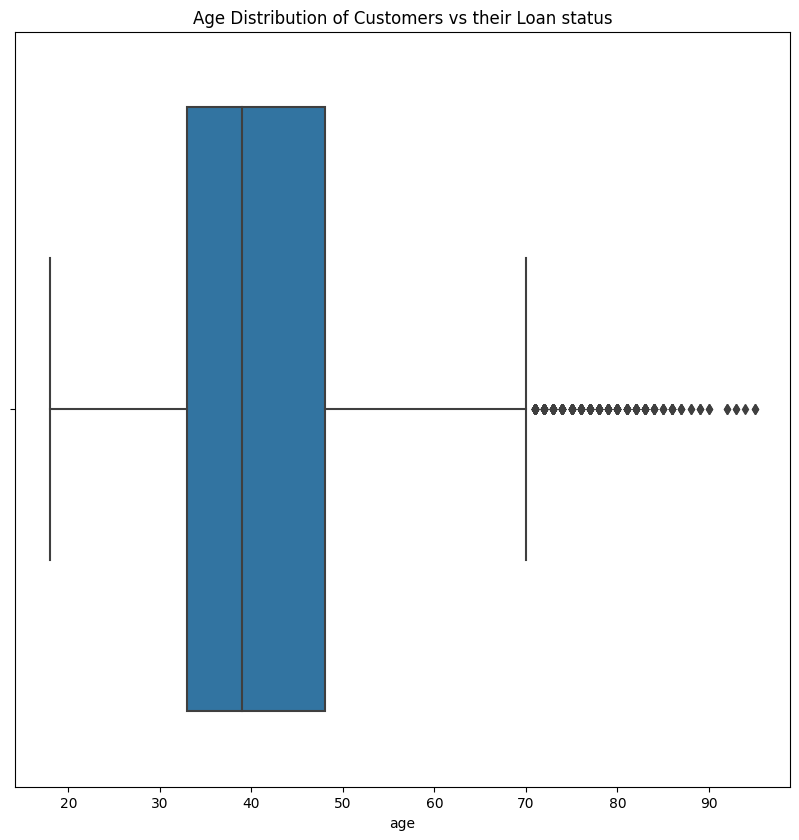

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
sns.boxplot(data=df,x='age',hue='y')
plt.title("Age Distribution of Customers vs their Loan status")
plt.show()


## Differences between ages and loan status of customers

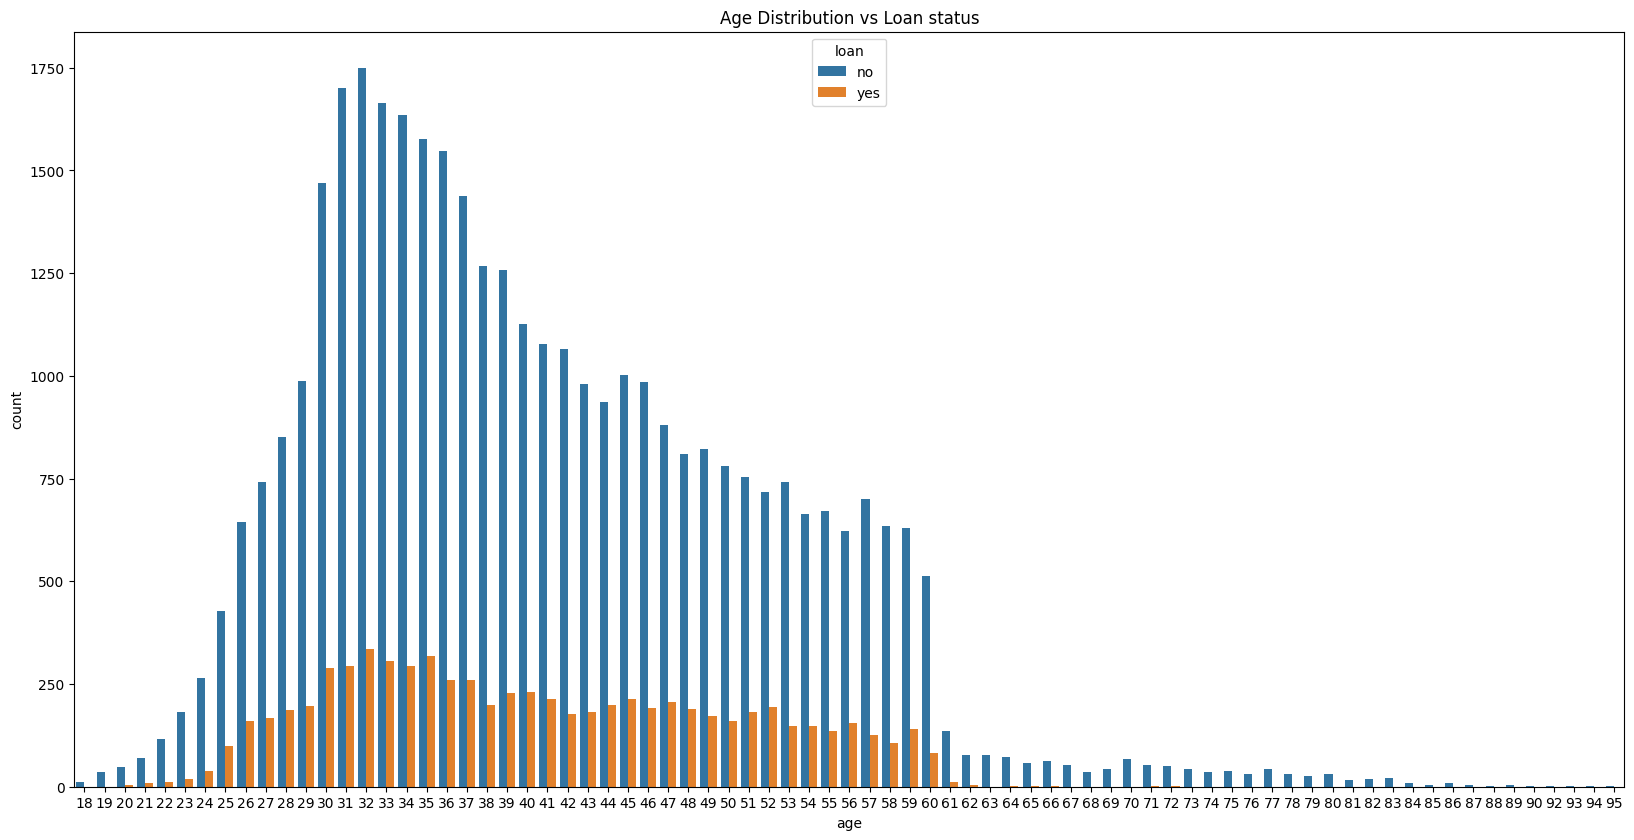

In [ ]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(data=df,x='age',hue='loan')
plt.title("Age Distribution vs Loan status")
plt.show()


## Martial Distribution Status of Customers

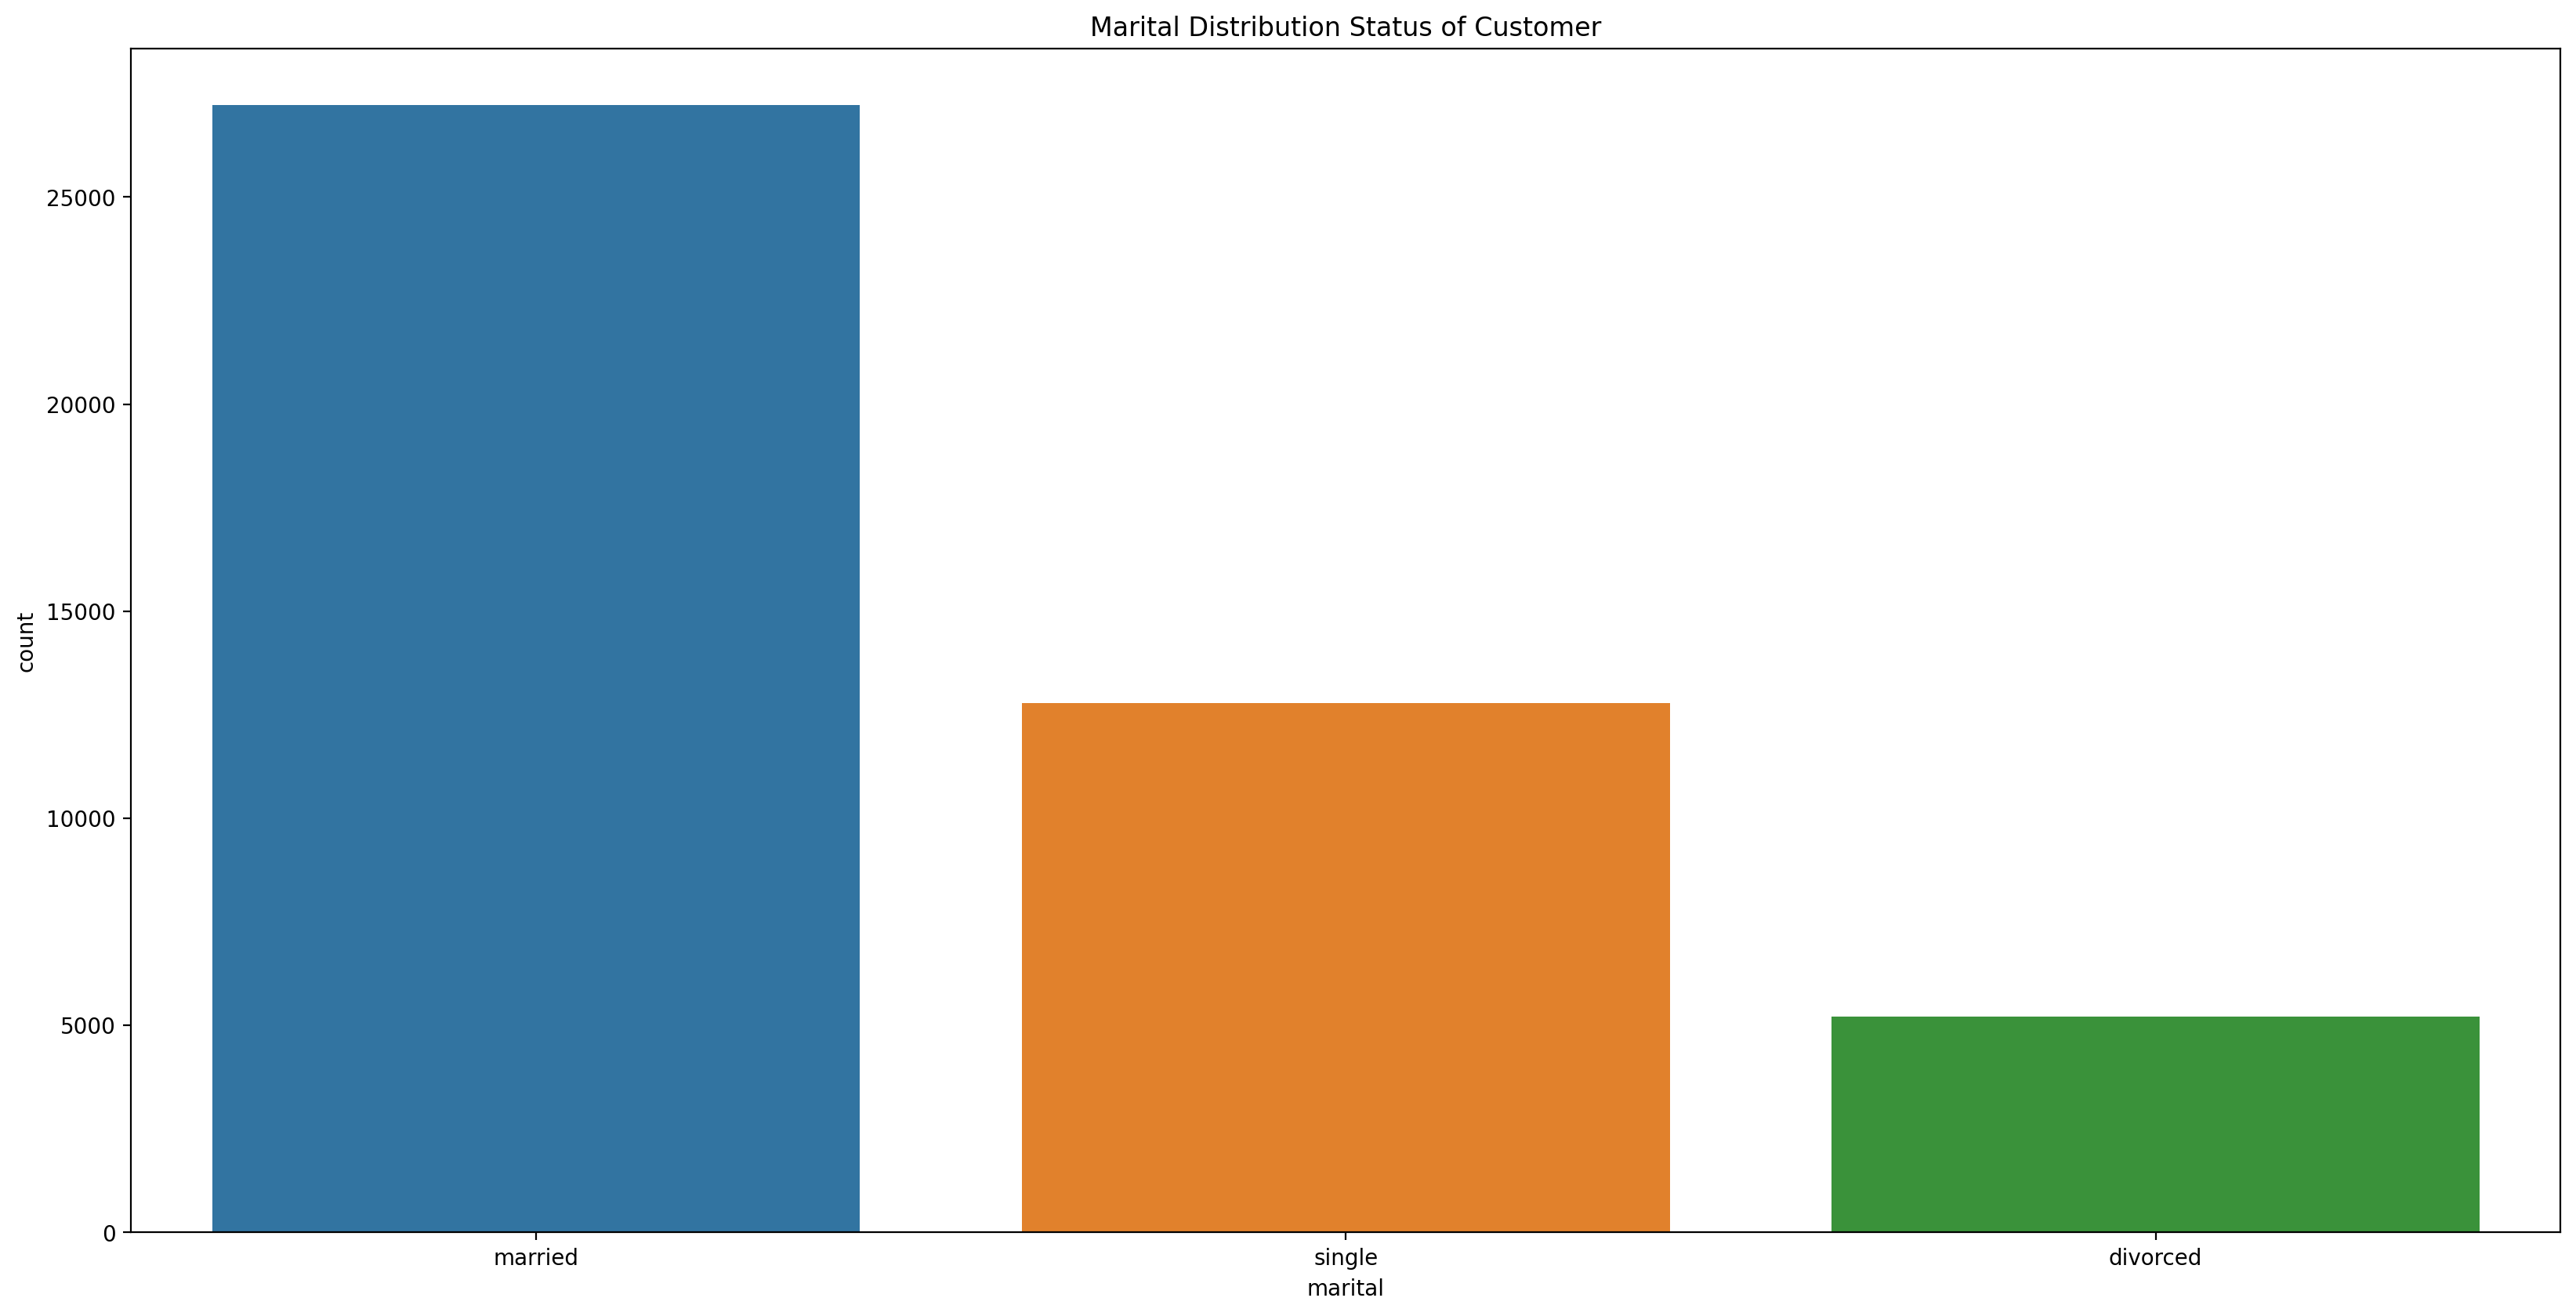

In [ ]:
plt.figure(figsize=(20,10),dpi=200)
sns.countplot(data=df,x='marital')
plt.title("Marital Distribution Status of Customer")
plt.show()

## P days distribution
## here -1 represents client was not previously contacted.

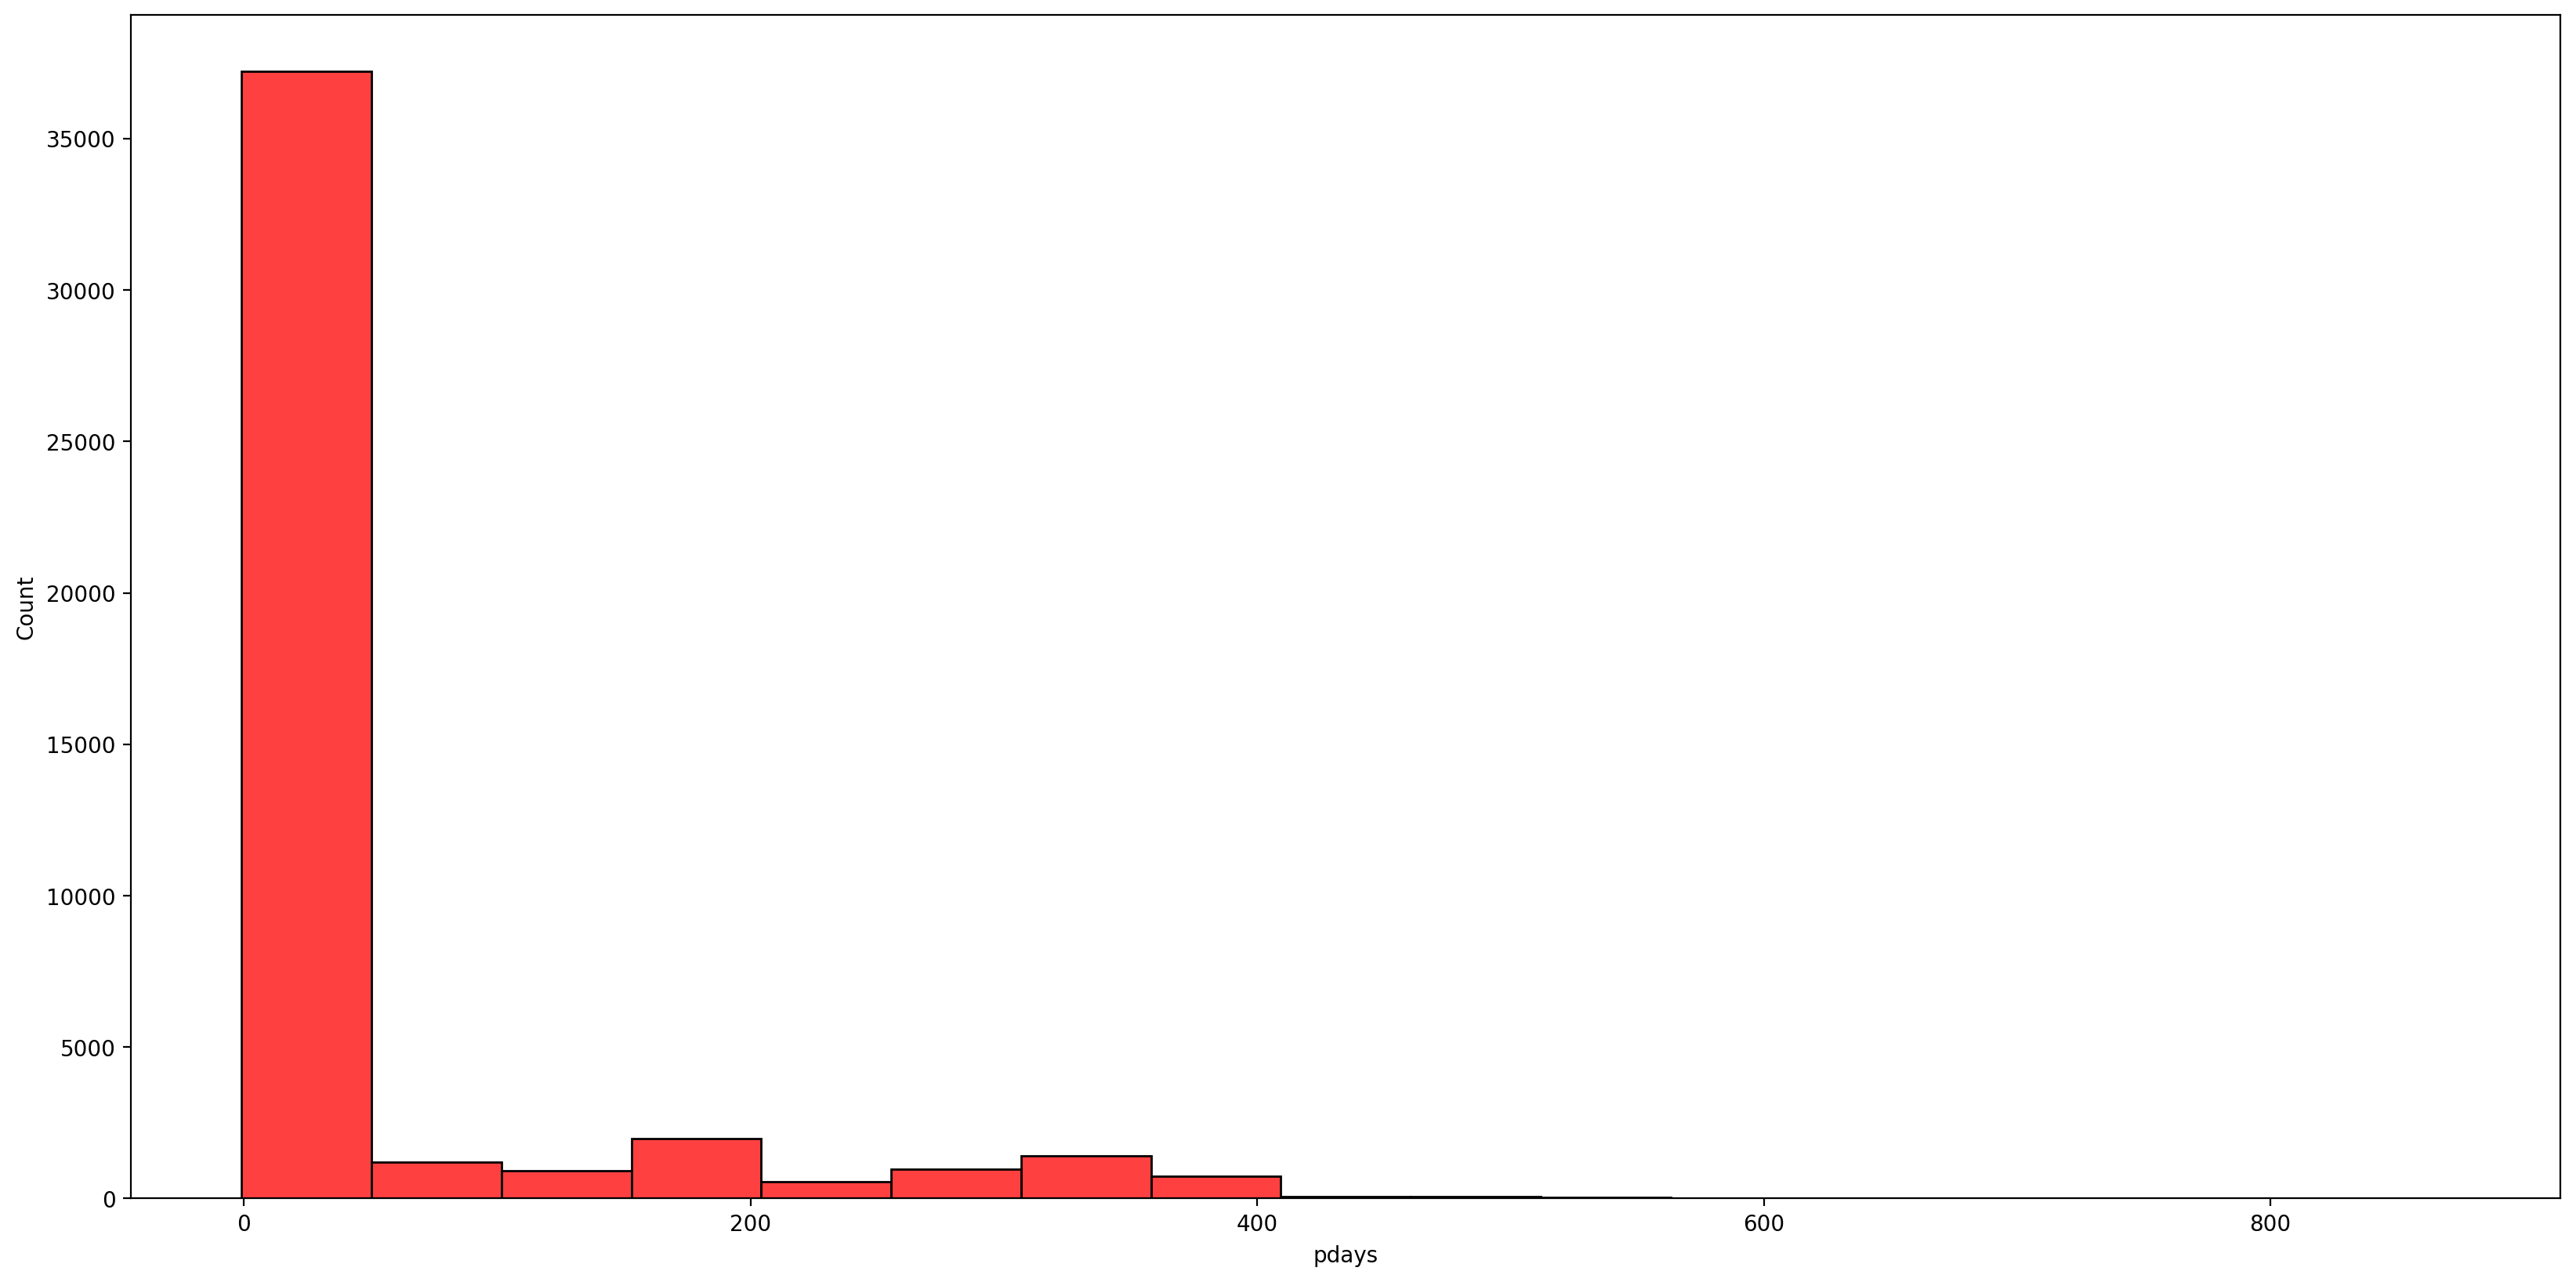

In [ ]:
plt.figure(figsize=(20,10),dpi=200)
sns.histplot(data=df,x='pdays',color='red')
plt.show()

In [ ]:
pd.DataFrame(df.pdays.value_counts()).head()

,pdays
-1,36954
182,167
92,147
91,126
183,126


## contacted clients Distribution

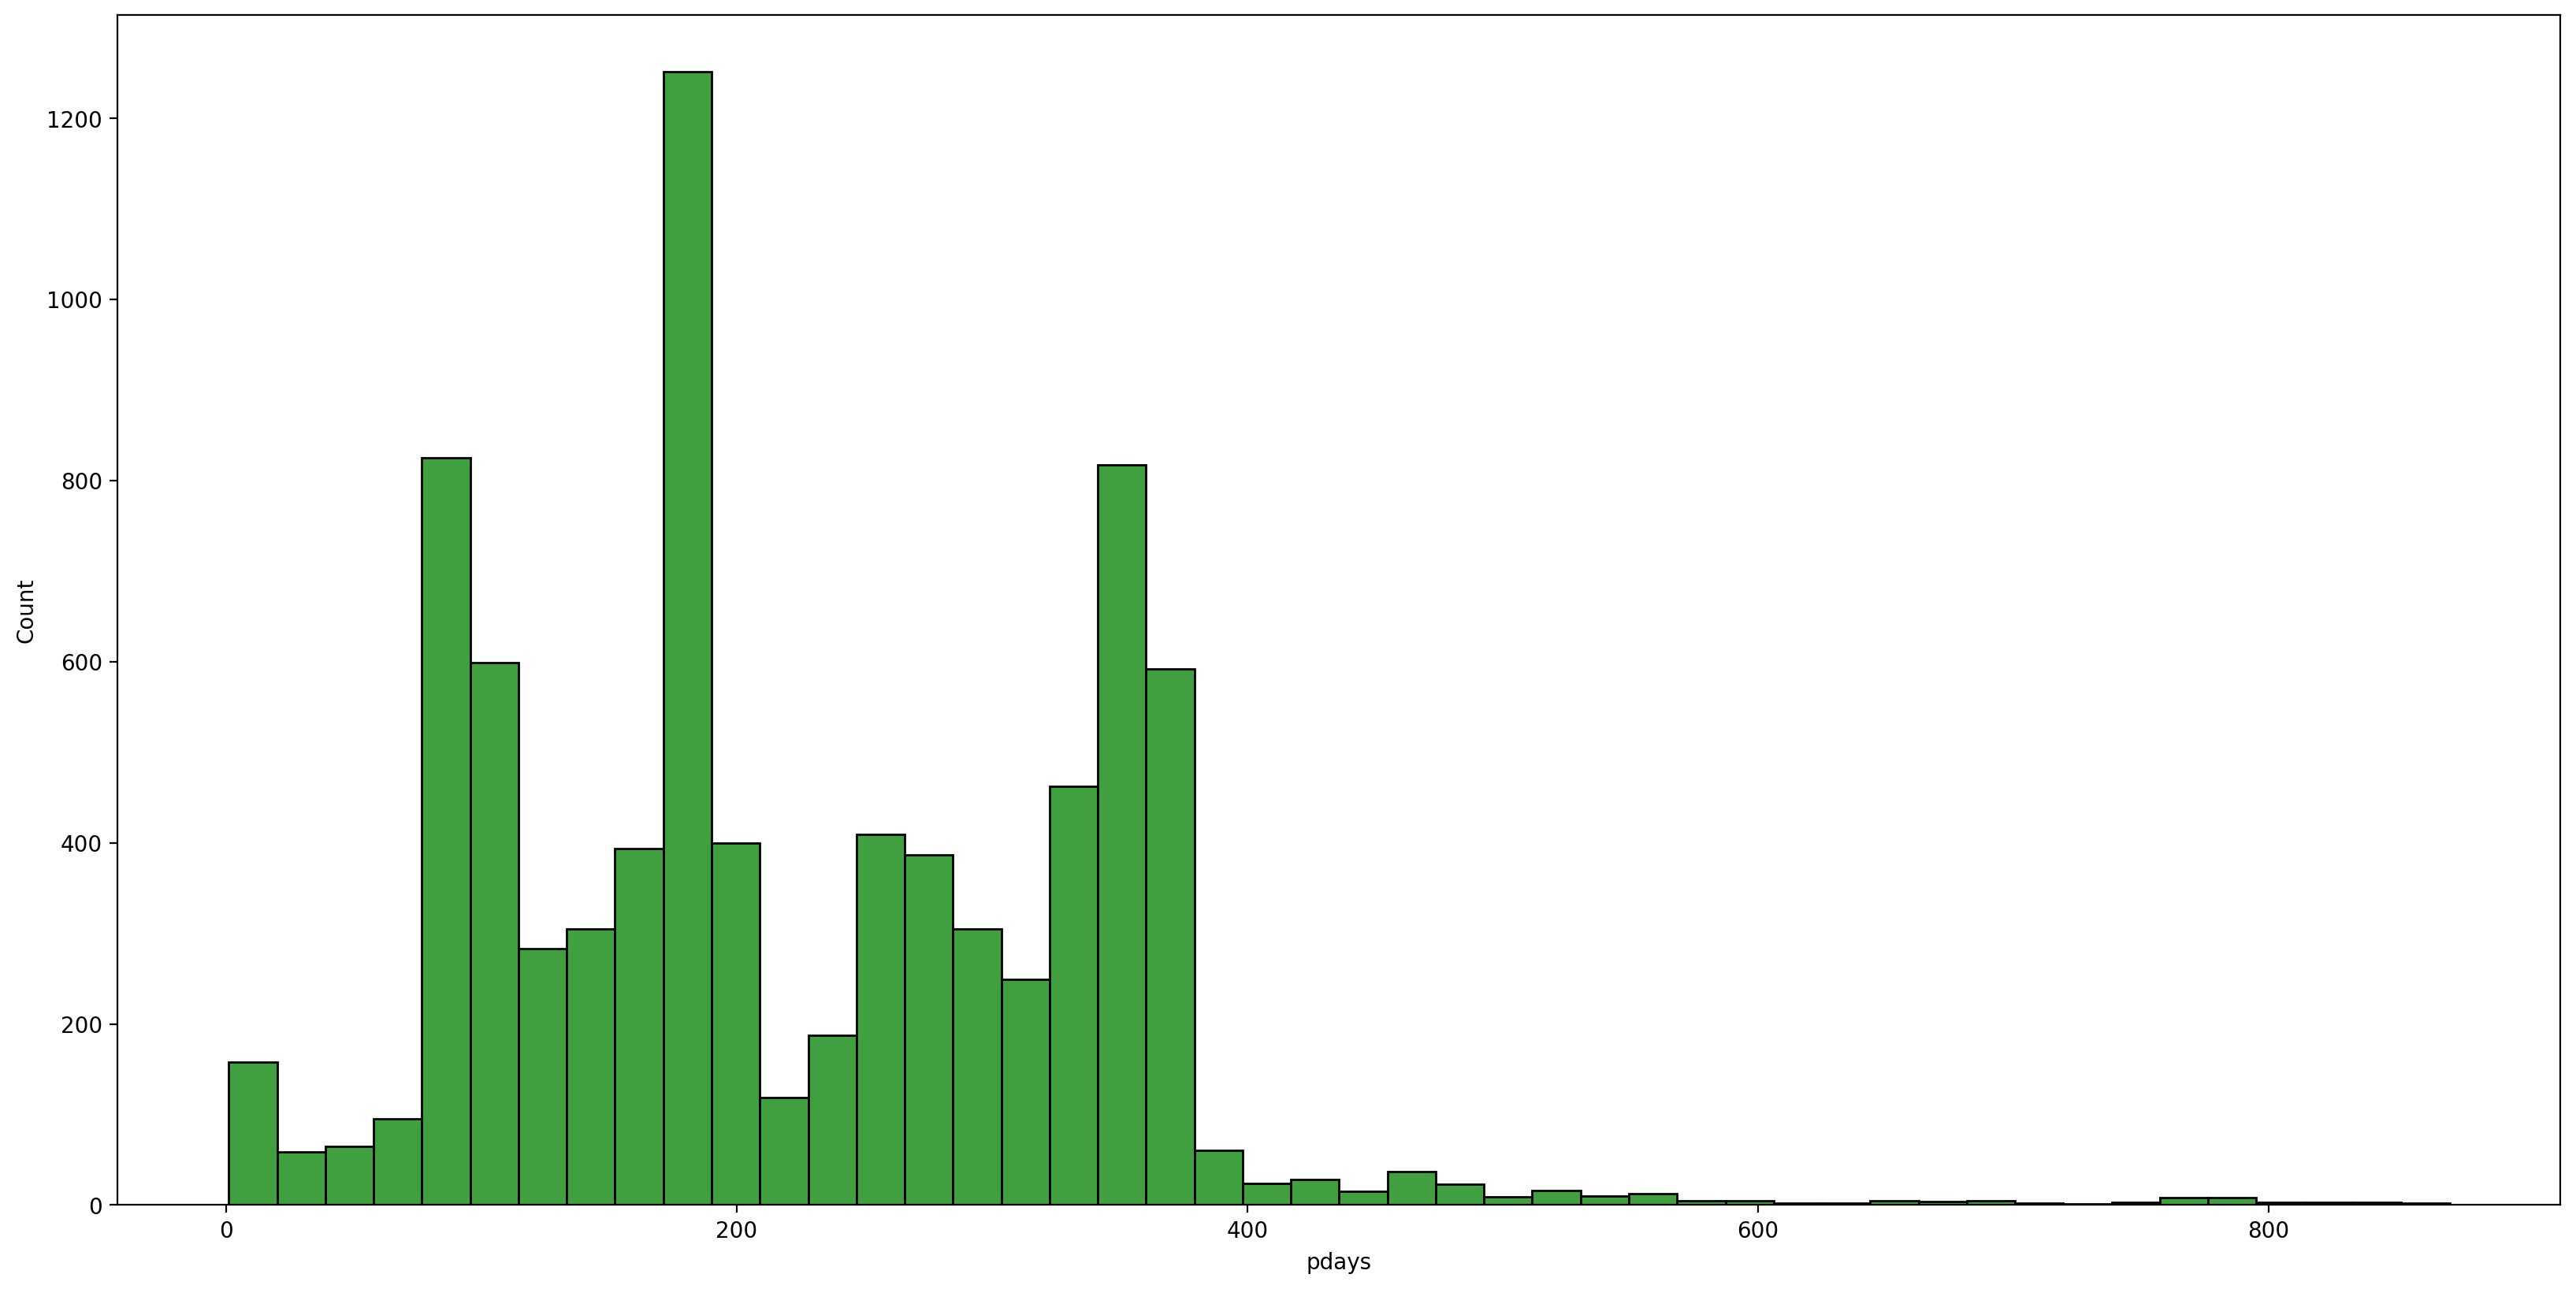

In [ ]:
plt.figure(figsize=(20,10),dpi=200)
sns.histplot(data=df[df.pdays!=-1],x='pdays',color='green')
plt.show()

## loan status of customers Distribution

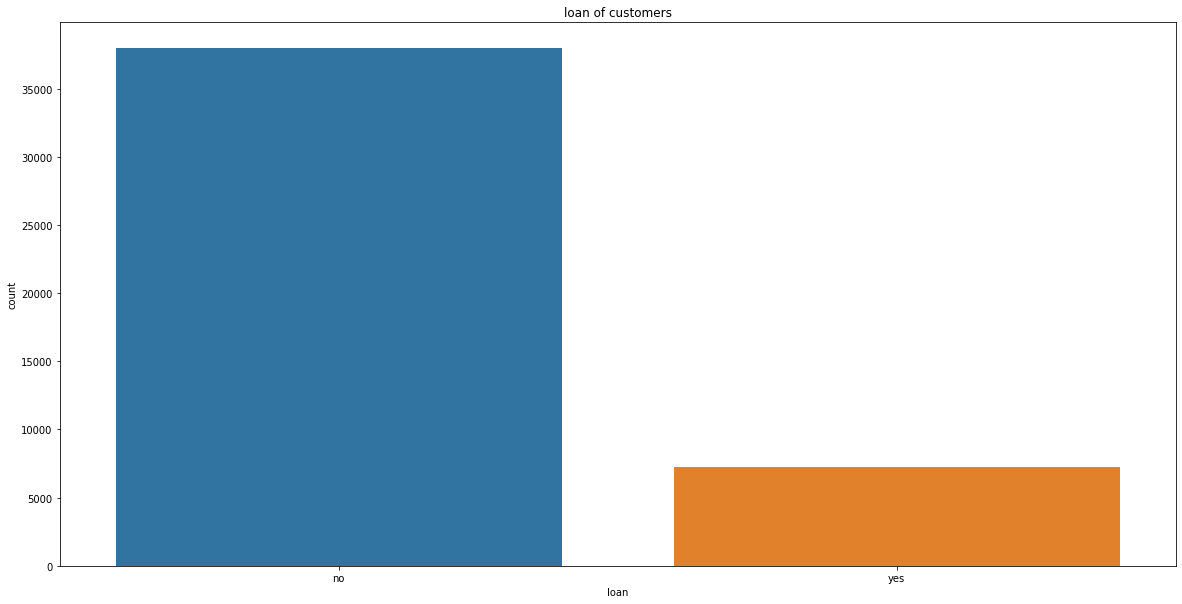

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['loan'])
plt.title('loan of customers')
plt.show()

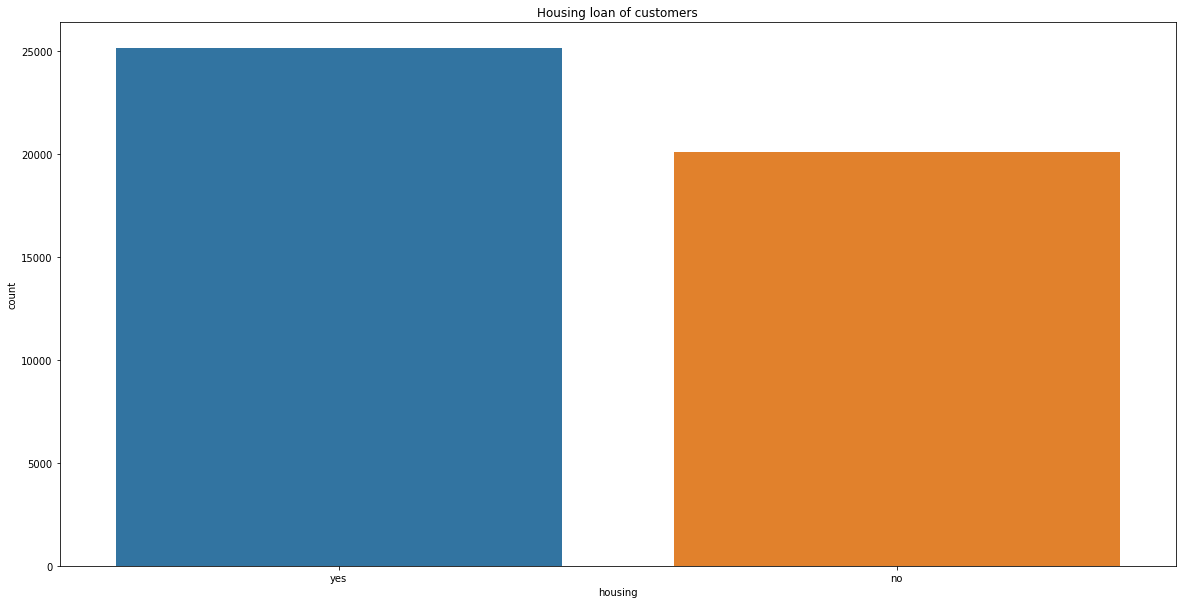

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['housing'])
plt.title('Housing loan of customers')
plt.show()

## jobs of customers distribution

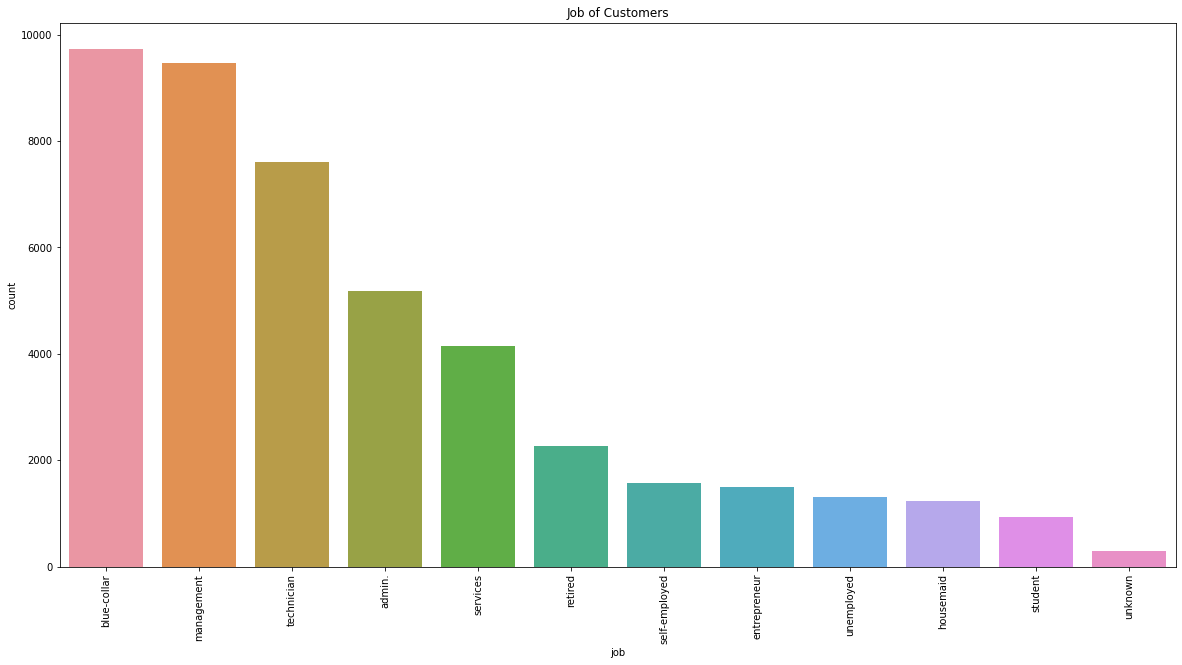

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='job',order=df.job.value_counts().index)
plt.title('Job of Customers')
plt.xticks(rotation=90)
plt.show()

## education of customers distribution

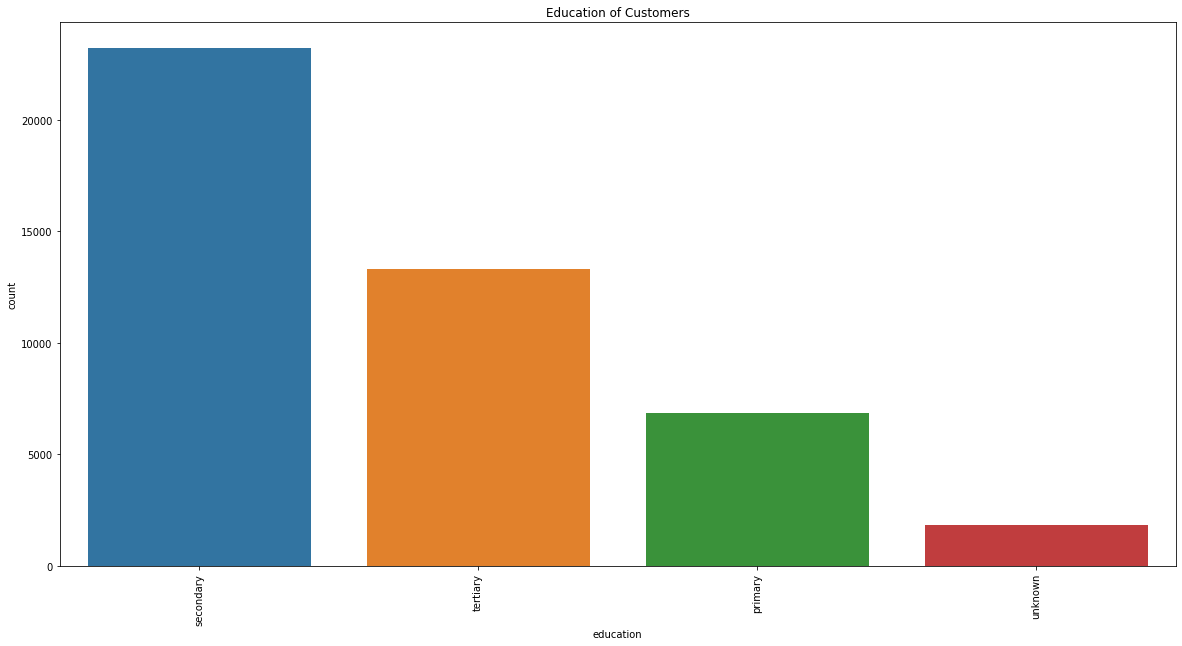

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='education',order=df.education.value_counts().index)
plt.title('Education of Customers')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Encoding Categorical Variables
df['job']=df['job'].map({'management':0,'technician':1,'entrepreneur':2,'blue-collar':3,'unknown':4,'retired':5,'admin.':6,
                               'services':7,'self-employed':8,'unemployed':9,'housemaid':10,'student':11})
df['marital']=df['marital'].map({'married':0,'single':1,'divorced':2})
df['education']=df['education'].map({'tertiary':0,'secondary':1,'unknown':2,'primary':3})
df['default']=df['default'].map({'no':0,'yes':1})
df['housing']=df['housing'].map({'no':0,'yes':1})
df['loan']=df['loan'].map({'no':0,'yes':1})

df['contact']=df['contact'].map({'unknown':0,'cellular':1,'telephone':2})
df['month']=df['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,
                                   'sep':8,'oct':9,'nov':10,'dec':11})
df['poutcome']=df['poutcome'].map({'unknown':0,'failure':1,'other':2,'success':3})
df['y']=df['y'].map({'no':0,'yes':1})

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,1,0,0,5,4,261,1,-1,0,0,0
1,44,1,1,1,0,29,1,0,0,5,4,151,1,-1,0,0,0
2,33,2,0,1,0,2,1,1,0,5,4,76,1,-1,0,0,0
3,47,3,0,2,0,1506,1,0,0,5,4,92,1,-1,0,0,0
4,33,4,1,2,0,1,0,0,0,5,4,198,1,-1,0,0,0


In [ ]:
df.shape

(45211, 17)

In [ ]:
X=df.drop('y',axis=1)
y=df['y']

## Model Building
## Naive Bayes

In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
NB=accuracy_score(y_test, y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',NB)

Accuracy_score: 0.8498967856089649


In [ ]:
print('Confusion_matrix of NB:')
print(confusion_matrix(y_test,y_pred))

Confusion_matrix of NB:
[[10740  1229]
 [  807   788]]


## Decision Tree

In [ ]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred=dt_model.predict(X_test)

In [ ]:
DT=accuracy_score(y_test, y_pred, normalize = True) #Accuracy of Decision tree' Model
print('Accuracy_score:',DT)

Accuracy_score: 0.8768799764081392


In [ ]:
print('Confusion_matrix of NB:')
print(confusion_matrix(y_test,y_pred))

Confusion_matrix of NB:
[[11111   858]
 [  812   783]]




## Random Forest Classifier

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31647, 16), (13564, 16), (31647,), (13564,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred_RFC=RFC.predict(X_test)

In [ ]:
acc_RFC=accuracy_score(y_test,y_pred_RFC)
con_RFC=confusion_matrix(y_test,y_pred_RFC)
report_RFC=classification_report(y_test,y_pred_RFC)

In [ ]:
print("Accuracy Score of Random Forest is :", acc_RFC)
print(f"Confusion Matrix : \n{con_RFC}")
print(f"Classification Report : \n{report_RFC}")

Accuracy Score of Random Forest is : 0.9020937776467118
Confusion Matrix : 
[[11558   411]
 [  917   678]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11969
           1       0.62      0.43      0.51      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.70      0.73     13564
weighted avg       0.89      0.90      0.89     13564



## Test case Checking for our model performance

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
RFC.predict([[46,3,0,1,0,6879,0,0,1,15,10,74,2,118,3,1]])

array([0])

In [ ]:
RFC.predict([[34,1,0,1,0,133,0,0,1,15,10,401,2,187,5,3]])

array([1])

In [ ]:
df.tail(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45181,46,3,0,1,0,6879,0,0,1,15,10,74,2,118,3,1,0
45182,34,1,0,1,0,133,0,0,1,15,10,401,2,187,5,3,1
45183,70,5,0,3,0,324,0,0,1,15,10,78,1,96,7,3,0
45184,63,5,0,1,0,1495,0,0,1,16,10,138,1,22,5,3,0
45185,60,7,0,0,0,4256,1,0,1,16,10,200,1,92,4,3,1
45186,59,4,0,2,0,1500,0,0,1,16,10,280,1,104,2,1,0
45187,32,7,1,1,0,1168,1,0,1,16,10,411,1,-1,0,0,1
45188,29,0,1,1,0,703,1,0,1,16,10,236,1,550,2,3,1
45189,25,7,1,1,0,199,0,0,1,16,10,173,1,92,5,1,0
45190,32,3,0,1,0,136,0,0,1,16,10,206,1,188,3,3,1
